In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2

In [28]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

In [29]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

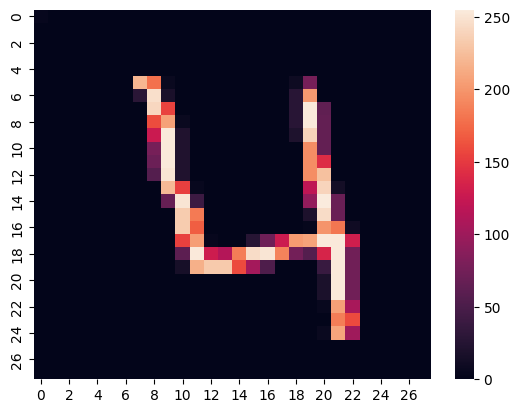

In [30]:
x = df_train.iloc[3][:-1].values
x = x.reshape(28, 28)
sns.heatmap(x)

<Axes: >

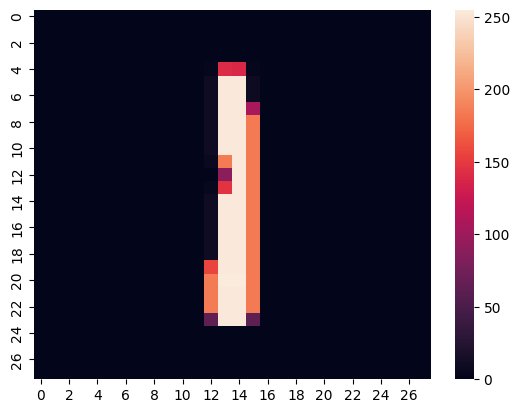

In [31]:
sns.heatmap(df_train.iloc[2][1:].values.reshape(28, 28))

In [32]:
X_train = df_train.drop('label', axis = 1)
y_train = df_train['label']
X_test = df_test.copy()

In [33]:
X_train = X_train / 255
X_test = X_test / 255

In [34]:
X_train.shape

(42000, 784)

In [35]:
y_train.shape

(42000,)

In [36]:
X_test.shape

(28000, 784)

In [37]:
from keras.utils import to_categorical

In [38]:
y_train = to_categorical(y_train)

In [39]:
y_train.shape

(42000, 10)

In [40]:
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from keras.optimizers import Adam

In [41]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 384, activation = 'relu'))
model.add(Dense(units = 384, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

C:\Users\Admin\Desktop\ML BMW\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [44]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9566 - loss: 0.1371
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9859 - loss: 0.0456
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.9903 - loss: 0.0317
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.9923 - loss: 0.0253
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 53s 40ms/step - accuracy: 0.9939 - loss: 0.0187
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 56s 42ms/step - accuracy: 0.9954 - loss: 0.0153
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 54s 41ms/step - accuracy: 0.9960 - loss: 0.0134
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.9962 - loss: 0.0121
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.9966 - loss: 0.0097
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9971 - loss: 0.0092


In [45]:
y_pred = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


In [46]:
data = []
for i in y_pred:
    data.append(i.argmax())

In [47]:
data = np.array(data)

In [48]:
df_sub['label'] = data

In [50]:
df_sub.to_csv('digit_sub.csv', index = False, index_label = False)

In [55]:
print(y_pred[0].argmax())

2
